In [8]:
import numpy as np
import scipy as sp
import heartpy as hp
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from biosppy.signals import ecg
import rr
import time_embed as te
from mpl_toolkits import mplot3d
from scipy import signal
import glob, os

%matplotlib inline

# Phase-Space Reconstruction
### The heart is a dynamical system. By recording only one value in time you essentially project higher dimensional behaviour of the heart onto one dimension.
Here I use time-delay embedding to attempt reconstruct the phase space trajectory of PPG signals.

### Let's first plot a Normotensive to see how they look

In [2]:
#Load csv file
D45 = pd.read_csv('Copy of D45 Normotensive.csv')
ppg_sig = np.array(D45['ppg'])
fs = 250

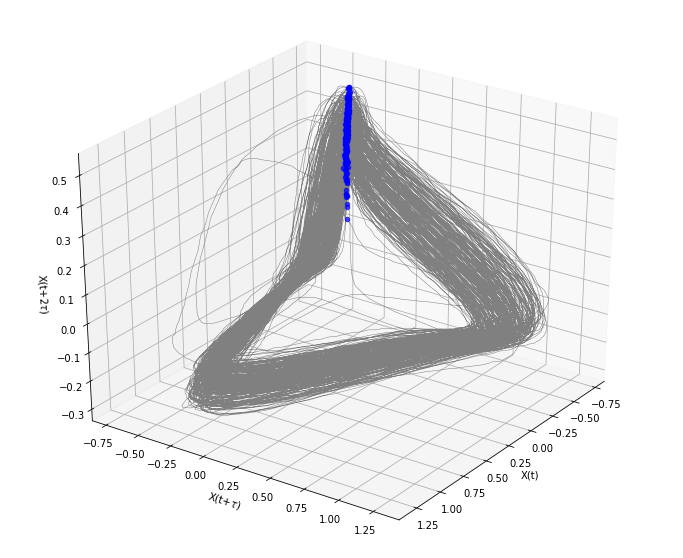

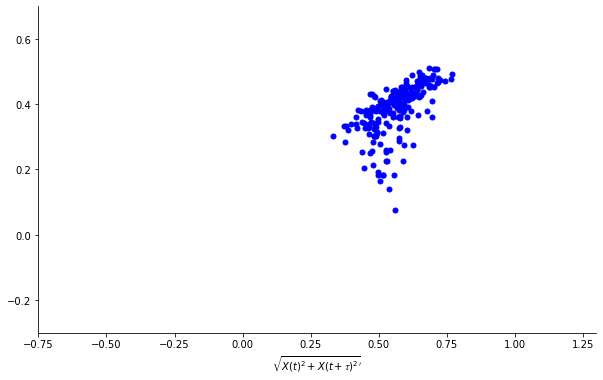

In [3]:
#Example Normotensive
_ = te.pc_sig(ppg_sig,250,10000,50000,np.pi/6,True,True)

### How about a hypertensive?

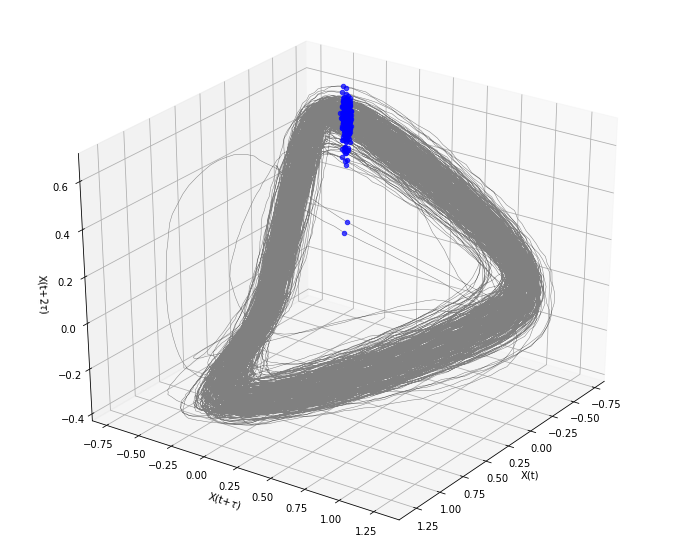

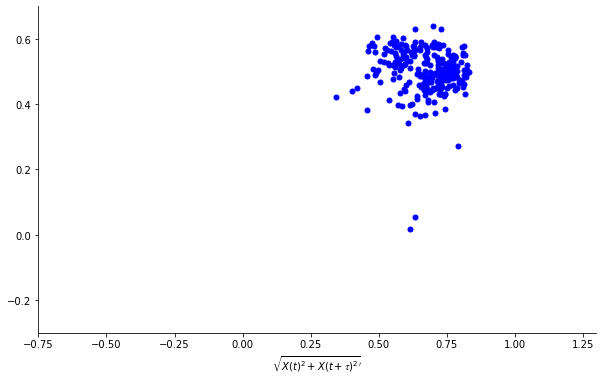

In [9]:
#Load csv file
D44 = pd.read_csv('Copy of D44 Hypertensive N Baa.csv')
ppg_sig = np.array(D44['ppg'])
fs = 250

#Example Normotensive
pc = te.pc_sig(ppg_sig,250,10000,50000,np.pi/6,True,True)

### Finally let's plot sections of all participants

In [51]:
#Empty arrays corresponding to different angles to add Poincare sections to
norm_a90 = []
norm_a180 = []
norm_a270 = []
norm_a360 = []

hyp_a90 = []
hyp_a180 = []
hyp_a270 = []
hyp_a360 = []

#List of test angles
theta_list = [90,180,270,360]

for file in glob.glob('*.csv'):
    
    #Load csv file
    df = pd.read_csv(file)
    ppg_sig = np.array(df['ppg'])
        
    if 'hyper' in file.lower():
        f_class = 1
    elif 'norm' in file.lower():
        f_class = 0
    elif 'hypo' in file.lower():
        f_class = -1
        continue
    else:
        continue
        
    if 'D46' in file:
        fs = 500
    else:
        fs = 250 
    
    #Get Poincare sections for each query angle
    for theta in theta_list:
        pc = te.pc_sig(ppg_sig,fs,10000,50000,np.radians(theta),False,False)
        
        if f_class == 1:
            eval('hyp_a{}.append(pc)'.format(str(theta)))
        elif f_class == 0:
            eval('norm_a{}.append(pc)'.format(str(theta)))

In [53]:
norm_a90 = np.vstack(norm_a90)
norm_a180 = np.vstack(norm_a180)
norm_a270 = np.vstack(norm_a270)
norm_a360 = np.vstack(norm_a360)

hyp_a90 = np.vstack(hyp_a90)
hyp_a180 = np.vstack(hyp_a180)
hyp_a270 = np.vstack(hyp_a270)
hyp_a360 = np.vstack(hyp_a360)

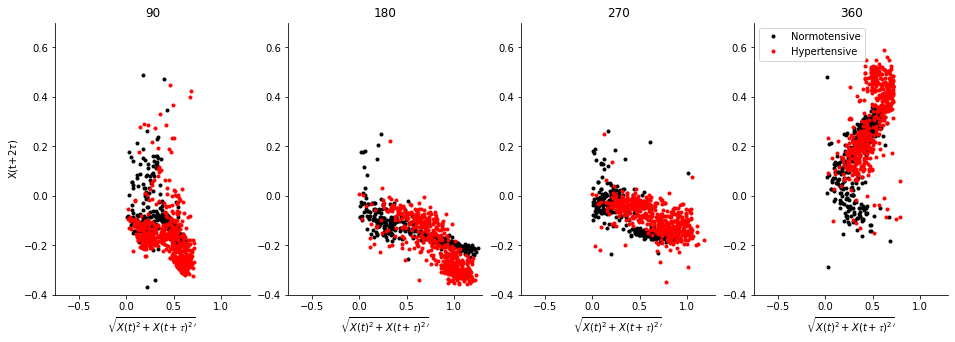

In [83]:
fig = plt.figure(figsize=(16,5))

norm_vars = [norm_a90,norm_a180,norm_a270,norm_a360]
hyp_vars = [hyp_a90,hyp_a180,hyp_a270,hyp_a360]

for i,theta in enumerate(theta_list):
    ax = plt.subplot(1,4,i+1)
    plt.plot(norm_vars[i][:,0],norm_vars[i][:,1],'o',color='k',markersize=3,label='Normotensive')
    plt.plot(hyp_vars[i][:,0],hyp_vars[i][:,1],'o',color='r',markersize=3,label='Hypertensive')
    plt.title(theta)
    ax.set_xlabel('$\sqrt{X(t)^2 + X(t+𝜏)^2}\'$')
    if i == 0:
        ax.set_ylabel(r'X(t+2$\tau$)')
    ax.set_xlim([-0.75,1.3])
    ax.set_ylim([-0.4,0.7])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.legend()